# Regex
## Task 7
### Name-Sanjay Dey
### Registration id - SIRSS2204





In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import warnings
warnings.filterwarnings('ignore')

## Q1. Implement gradient descent (for simple linear regression) from scratch.

In [2]:
def estimate_coef(x,y):
    n = np.size(x)
    m_x,m_y = np.mean(x) , np.mean(y)
    ss_xy = np.sum(y*x) - n*m_y*m_x
    ss_xx = np.sum(x*x) - n*m_x*m_x
    
    
    theta_1 = ss_xy / ss_xx
    theta_0 = m_y - theta_1*m_x
    
    return(theta_0, theta_1)

In [3]:
def plot_regression_line(x,y,theta):
    plt.scatter(x,y,marker="o",s=30)
    y_pred = theta[0] + theta[1]*x
    plt.plot(x,y_pred,color = "r")
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

estimated coeff: 
theta_0 = 11.236363636363636 
theta_1 = 1.1696969696969697


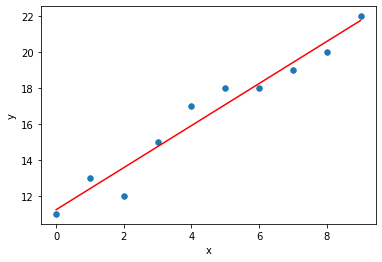

24.103


In [4]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([11,13,12,15,17,18,18,19,20,22])
theta = estimate_coef(x,y)
print("estimated coeff: \ntheta_0 = {} \ntheta_1 = {}".format(theta[0],theta[1]))
plot_regression_line(x,y,theta)
print(round(theta[0] + theta[1]*11,4))

# Kaggle competition

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
submision_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [5]:
train_data = pd.read_csv('train-2.csv')
test_data = pd.read_csv('test 2.csv')
submission_data = pd.read_csv('sample_submission.csv')

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

In [8]:
train_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#Drop Id column
train_data = train_data.drop('Id', axis=1)

In [10]:
#Fill LotFrontage with mean values
meanLot = train_data['LotFrontage'].mean()
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(meanLot)

In [11]:
#Fill GarageYrBlt with constant 0 value for houses with no grarage or masonry
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

In [12]:
#Change data type of MSSubClass to repersent categorical data
train_data['MSSubClass'] = train_data['MSSubClass'].astype(str)

In [13]:
train_data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

### Fill Missing Values for Categorical Data
In some cases, nan actually repersents a category (e.g., for the column Alley, a house may not have access to alley, therefore, nan is a valid category). For the rest of the cateogrical values we can fill missing values with the mode.

In [14]:
train_data.select_dtypes('object').loc[:, train_data.isna().sum() > 0].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [15]:
#Fill missing values with constant
for column in ['Alley', 
               'BsmtQual', 
               'BsmtCond',
               'BsmtExposure', 
               'BsmtFinType1', 
               'BsmtFinType2',
               'FireplaceQu', 
               'GarageType', 
               'GarageFinish',
               'GarageQual', 
               'GarageCond',
               'PoolQC', 
               'Fence'
              ]:
    train_data[column] = train_data[column].fillna('none')
#Fill missing values with mode
for column in ['MasVnrType', 
               'Electrical', 
               'MiscFeature']:
    mode = train_data[column].mode()
    train_data[column] = train_data[column].fillna(mode[0])

In [16]:
train_data.isna().sum().sum()

0

# Exploratory Data Analysis

## Exploring Numeric Features

In [17]:
numeric_corr = train_data.corr()
corr_pairs = numeric_corr.unstack()

In [18]:
#Find the numeric features which have the highest correlation with Sale Price
sorted_corr = corr_pairs['SalePrice'].sort_values(ascending=False).apply(abs)
highNumeric = sorted_corr[sorted_corr > 0.5]
highNumeric

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

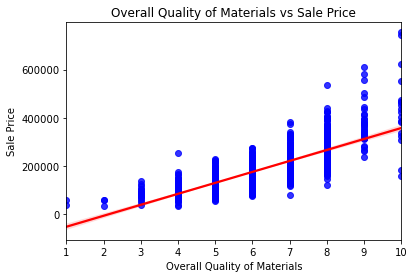

In [19]:
sns.regplot(x='OverallQual', y='SalePrice', data=train_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Overall Quality of Materials vs Sale Price')
plt.xlabel('Overall Quality of Materials')
plt.ylabel('Sale Price')
plt.show()

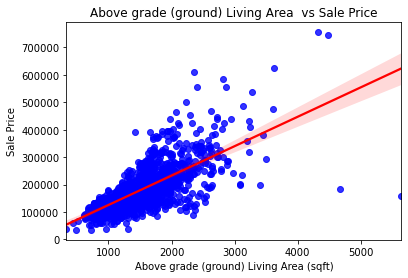

In [20]:
sns.regplot(x='GrLivArea', y='SalePrice', data=train_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Above grade (ground) Living Area  vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

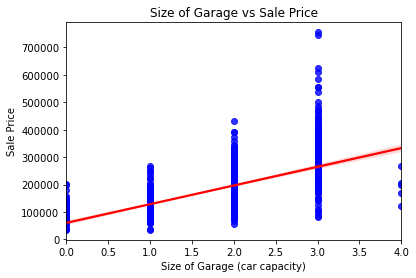

In [21]:
sns.regplot(x='GarageCars', y='SalePrice', data=train_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Size of Garage vs Sale Price')
plt.xlabel('Size of Garage (car capacity)')
plt.ylabel('Sale Price')
plt.show()

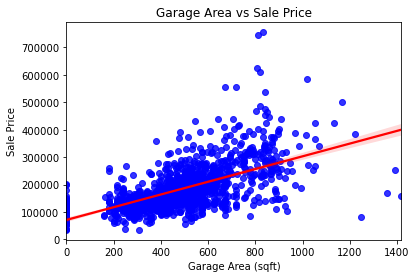

In [22]:
sns.regplot(x='GarageArea', y='SalePrice', data=train_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

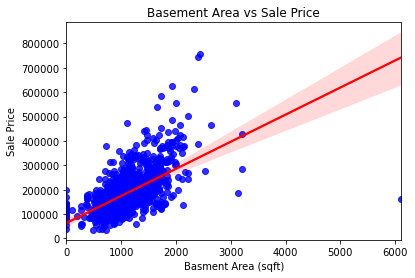

In [23]:
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Basement Area vs Sale Price')
plt.xlabel('Basment Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

## Exploring Categorical Features

In [24]:
df_cat = train_data.copy()
df_cat = df_cat.select_dtypes('object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,none,Attchd,RFn,TA,TA,Y,none,none,Shed,WD,Normal
1,20,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,Shed,WD,Normal
2,60,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,Shed,WD,Normal
3,70,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,none,none,Shed,WD,Abnorml
4,60,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,Shed,WD,Normal


In [25]:
for column in df_cat.columns:
    df_cat[column] = df_cat[column].astype('category').cat.codes

In [26]:
df_cat = pd.concat([df_cat, train_data['SalePrice']], axis=1)
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,9,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,2,8,4,208500
1,4,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,2,8,4,181500
2,9,3,1,2,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,2,8,4,223500
3,10,3,1,2,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,2,8,0,140000
4,9,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,2,8,4,250000


In [27]:
cat_corr = df_cat.corr()
catcorr_pairs = cat_corr.unstack()

In [28]:
#Find the categorical features which have the highest correlation with Sale Price
sorted_Catcorr = catcorr_pairs['SalePrice'].sort_values(ascending=False).apply(abs)
highCat = sorted_Catcorr[sorted_Catcorr >= 0.5]
highCat

SalePrice       1.000000
GarageFinish    0.549247
KitchenQual     0.589189
BsmtQual        0.620886
ExterQual       0.636884
dtype: float64

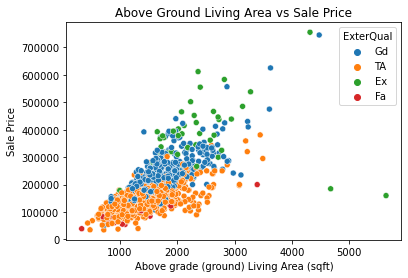

In [29]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, hue='ExterQual')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

* Ex = Excellent
* Gd = Good
* TA = Average
* Fa = Fair
* Po = Poor

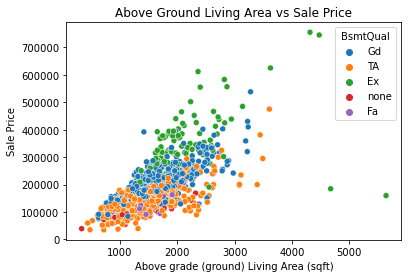

In [30]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, hue='BsmtQual')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

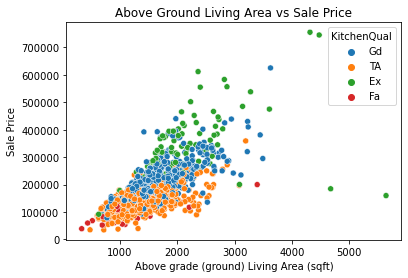

In [31]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, hue='KitchenQual')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

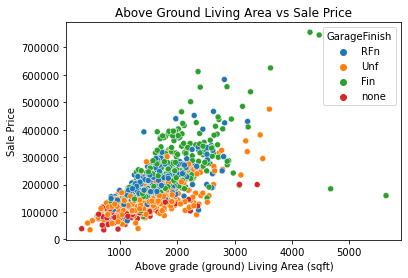

In [32]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, hue='GarageFinish')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

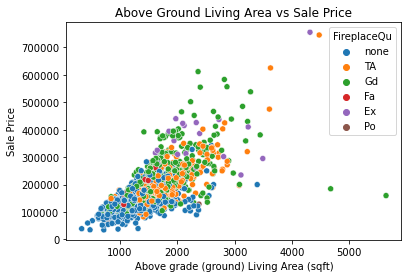

In [33]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, hue='FireplaceQu')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

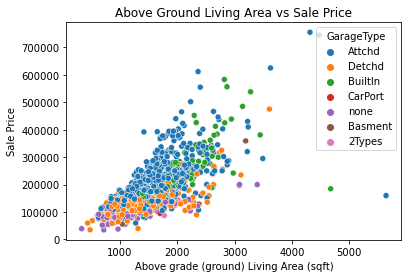

In [34]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, hue='GarageType')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above grade (ground) Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

# Feature Transformation

In [35]:
import scipy.stats
df_skew = pd.DataFrame(train_data.select_dtypes(np.number).columns, columns=['Features'])
df_skew['Skew'] = df_skew['Features'].apply(lambda feature: scipy.stats.skew(train_data[feature]))
df_skew['Abs Skew'] = df_skew['Skew'].apply(abs)
df_skew['Skewed'] = df_skew['Abs Skew'].apply(lambda x: True if x >= 0.5 else False)
df_skew

,Features,Skew,Abs Skew,Skewed
0,LotFrontage,2.382499,2.382499,True
1,LotArea,12.195142,12.195142,True
2,OverallQual,0.216721,0.216721,False
3,OverallCond,0.692355,0.692355,True
4,YearBuilt,-0.612831,0.612831,True
5,YearRemodAdd,-0.503044,0.503044,True
6,MasVnrArea,2.674865,2.674865,True
7,BsmtFinSF1,1.683771,1.683771,True
8,BsmtFinSF2,4.250888,4.250888,True
9,BsmtUnfSF,0.919323,0.919323,True


In [36]:
df_skew.query('Skewed == True')['Features']

0       LotFrontage
1           LotArea
3       OverallCond
4         YearBuilt
5      YearRemodAdd
6        MasVnrArea
7        BsmtFinSF1
8        BsmtFinSF2
9         BsmtUnfSF
10      TotalBsmtSF
11         1stFlrSF
12         2ndFlrSF
13     LowQualFinSF
14        GrLivArea
15     BsmtFullBath
16     BsmtHalfBath
18         HalfBath
20     KitchenAbvGr
21     TotRmsAbvGrd
22       Fireplaces
23      GarageYrBlt
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
35        SalePrice
Name: Features, dtype: object

In [37]:
for column in df_skew.query('Skewed == True')['Features'].values:
    train_data[column] = np.log1p(train_data[column])

# Feature Engineering
Now that we have some preliminary insights about how each important variable would affect the Sale Price. We will select the features that will be used in prediction for our future models.

In [38]:
features = train_data[['OverallQual', 'GrLivArea', 
                       'GarageCars', 'GarageArea', 
                       'TotalBsmtSF', '1stFlrSF', 
                       'FullBath', 'TotRmsAbvGrd', 
                       'YearBuilt', 'YearRemodAdd', 
                       'MasVnrArea', 'Fireplaces', 
                       'GarageFinish', 'KitchenQual', 
                       'BsmtQual', 'ExterQual', 'SalePrice']]
features.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageFinish,KitchenQual,BsmtQual,ExterQual,SalePrice
0,7,7.444833,2,548,6.753438,6.753438,2,2.197225,7.602900,7.602900,5.283204,0.000000,RFn,Gd,Gd,Gd,12.247699
1,6,7.141245,2,460,7.141245,7.141245,2,1.945910,7.589336,7.589336,0.000000,0.693147,RFn,TA,Gd,TA,12.109016
2,7,7.488294,2,608,6.825460,6.825460,2,1.945910,7.601902,7.602401,5.093750,0.693147,RFn,Gd,Gd,Gd,12.317171
3,7,7.448916,3,642,6.629363,6.869014,1,2.079442,7.557995,7.586296,0.000000,0.693147,Unf,Gd,TA,TA,11.849405
4,8,7.695758,3,836,7.044033,7.044033,2,2.302585,7.601402,7.601402,5.860786,0.693147,RFn,Gd,Gd,Gd,12.429220


In [39]:
features.shape

(1460, 17)

In [40]:
features.select_dtypes('object').head()

,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,RFn,Gd,Gd,Gd
1,RFn,TA,Gd,TA
2,RFn,Gd,Gd,Gd
3,Unf,Gd,TA,TA
4,RFn,Gd,Gd,Gd


In [41]:
ordinal_features = ['KitchenQual',
                    'BsmtQual',
                    'ExterQual']

nominal_features = 'GarageFinish'

In [42]:
ordinal_orderings = [
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'none'],
    ['Ex', 'Gd', 'TA', 'Fa', 'Po']
]

In [43]:
#Ordinal Encoding
def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

#One-hot Encode Categorical Variables
def onehot_encode(df):
    df = df.copy()
    for column in df[[nominal_features]]:
        features_one_hot = pd.get_dummies(df[column])
        df = pd.concat([df, features_one_hot], axis =1)
        df = df.drop(column, axis=1)
    return df

data = ordinal_encode(features, ordinal_features, ordinal_orderings)
data = onehot_encode(data)
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,KitchenQual,BsmtQual,ExterQual,SalePrice,Fin,RFn,Unf,none
0,7,7.444833,2,548,6.753438,6.753438,2,2.197225,7.602900,7.602900,5.283204,0.000000,1,1,1,12.247699,0,1,0,0
1,6,7.141245,2,460,7.141245,7.141245,2,1.945910,7.589336,7.589336,0.000000,0.693147,2,1,2,12.109016,0,1,0,0
2,7,7.488294,2,608,6.825460,6.825460,2,1.945910,7.601902,7.602401,5.093750,0.693147,1,1,1,12.317171,0,1,0,0
3,7,7.448916,3,642,6.629363,6.869014,1,2.079442,7.557995,7.586296,0.000000,0.693147,1,2,2,11.849405,0,0,1,0
4,8,7.695758,3,836,7.044033,7.044033,2,2.302585,7.601402,7.601402,5.860786,0.693147,1,1,1,12.429220,0,1,0,0


In [44]:
data.shape

(1460, 20)

In [45]:
data = data.astype('float64')
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,KitchenQual,BsmtQual,ExterQual,SalePrice,Fin,RFn,Unf,none
0,7.0,7.444833,2.0,548.0,6.753438,6.753438,2.0,2.197225,7.602900,7.602900,5.283204,0.000000,1.0,1.0,1.0,12.247699,0.0,1.0,0.0,0.0
1,6.0,7.141245,2.0,460.0,7.141245,7.141245,2.0,1.945910,7.589336,7.589336,0.000000,0.693147,2.0,1.0,2.0,12.109016,0.0,1.0,0.0,0.0
2,7.0,7.488294,2.0,608.0,6.825460,6.825460,2.0,1.945910,7.601902,7.602401,5.093750,0.693147,1.0,1.0,1.0,12.317171,0.0,1.0,0.0,0.0
3,7.0,7.448916,3.0,642.0,6.629363,6.869014,1.0,2.079442,7.557995,7.586296,0.000000,0.693147,1.0,2.0,2.0,11.849405,0.0,0.0,1.0,0.0
4,8.0,7.695758,3.0,836.0,7.044033,7.044033,2.0,2.302585,7.601402,7.601402,5.860786,0.693147,1.0,1.0,1.0,12.429220,0.0,1.0,0.0,0.0


# Data Preprocessing

In [46]:
def preprocessing_inputs(df):
    df = df.copy()
    
    #Split DataFrame
    y = df['SalePrice']
    X = df.drop('SalePrice', axis=1)
    
    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    #Scale X
    scaler = StandardScaler()
    X_train = scaler.fit(X_train).transform(X_train)
    X_test = scaler.fit(X_test).transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = preprocessing_inputs(data)

In [48]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1022, 19) (1022,)
Test set: (438, 19) (438,)


# Model Training

## Linear Regression

In [49]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Linear Regression Model Trained')

Linear Regression Model Trained


## Ridge Regression

In [50]:
parameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [51]:
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=parameters, cv=10)
ridge_cv.fit(X_train, y_train)
print('Ridge Regression Model Trained')

Ridge Regression Model Trained


In [52]:
print('Best parameters:', ridge_cv.best_params_)
print('Highest Accuracy:', '{:.2%}'.format(ridge_cv.best_score_))

Best parameters: {'alpha': 100, 'solver': 'sparse_cg'}
Highest Accuracy: 83.21%


## Lasso

In [53]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'selection': ['cyclic', 'random']}

In [54]:
lasso = Lasso()
lasso_cv = GridSearchCV(estimator=lasso, param_grid=parameters, cv=10)
lasso_cv.fit(X_train, y_train)
print('Lasso Regression Model Trained')

Lasso Regression Model Trained


In [55]:
print('Best parameters:', lasso_cv.best_params_)
print('Highest Accuracy:', '{:.2%}'.format(lasso_cv.best_score_))

Best parameters: {'alpha': 0.001, 'selection': 'cyclic'}
Highest Accuracy: 83.12%


# Training Results

In [56]:
yhat_lin = linreg.predict(X_test)
yhat_ridge = ridge_cv.predict(X_test)
yhat_lasso = lasso_cv.predict(X_test)

In [57]:
lin_r2 = r2_score(y_test, yhat_lin)
ridge_r2 = r2_score(y_test, yhat_ridge)
lasso_r2 = r2_score(y_test, yhat_lasso)

In [58]:
print('Linear Regression R2-score: ', '{:.5}'.format(lin_r2))
print('Ridge Regression R2-score:  ', '{:.5}'.format(ridge_r2))
print('Lasso Regression R2-score:  ', '{:.5}'.format(lasso_r2))

Linear Regression R2-score:  0.85286
Ridge Regression R2-score:   0.84581
Lasso Regression R2-score:   0.85204


In [59]:
lin_mse = np.mean((yhat_lin - y_test) ** 2)
ridge_mse = np.mean((yhat_ridge - y_test) ** 2)
lasso_mse = np.mean((yhat_lasso - y_test) ** 2)

In [60]:
print('Linear Regression MSE:', '{:.3}'.format(lin_mse))
print('Ridge Regression MSE: ', '{:.3}'.format(ridge_mse))
print('Lasso Regression MSE: ', '{:.3}'.format(lasso_mse))

Linear Regression MSE: 0.0278
Ridge Regression MSE:  0.0291
Lasso Regression MSE:  0.028


In [61]:
model_dict = {'model':['Linear', 'Ridge', 'Lasso'],
              'R2_score': [lin_r2, ridge_r2, lasso_r2],
              'MSE': [lin_mse, ridge_mse, lasso_mse]}
model_results = pd.DataFrame.from_dict(model_dict)
model_results

,model,R2_score,MSE
0,Linear,0.852856,0.027808
1,Ridge,0.845810,0.029140
2,Lasso,0.852036,0.027963


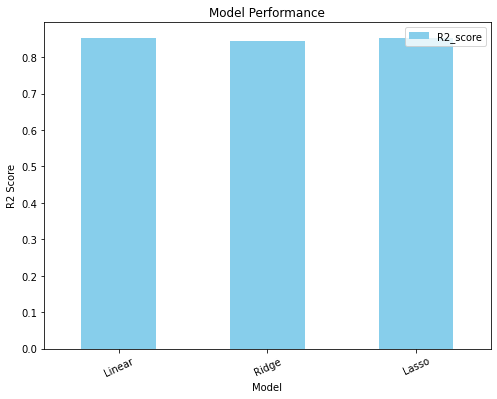

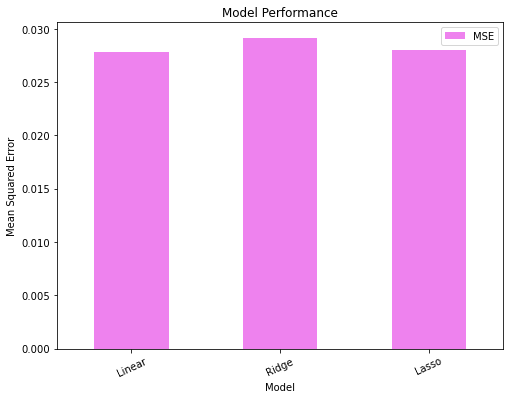

In [62]:
model_results.plot(kind='bar', x='model', y='R2_score', color='skyblue', figsize=(8,6))
plt.title('Model Performance')
plt.xlabel('Model')
plt.xticks(rotation=25)
plt.ylabel('R2 Score')
plt.show()
model_results.plot(kind='bar', x='model', y='MSE', color='violet', figsize=(8,6))
plt.title('Model Performance')
plt.xlabel('Model')
plt.xticks(rotation=25)
plt.ylabel('Mean Squared Error')
plt.show()

As we can see all our models performed similarly according, however, if we look at our R2 score and MSE, the model that peforms best is the Linear Regression model. Therefore, we will use the Linear Regression model on our test set.

# Model Evaluation using Test set

### Load Test set for evaluation

In [63]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Since, we have created our model on only a select few features we will perform our preprocessing on these features only.

### Clean Data

In [64]:
test_features = test_data[['OverallQual', 'GrLivArea', 
                       'GarageCars', 'GarageArea', 
                       'TotalBsmtSF', '1stFlrSF', 
                       'FullBath', 'TotRmsAbvGrd', 
                       'YearBuilt', 'YearRemodAdd', 
                       'MasVnrArea', 'Fireplaces', 
                       'GarageFinish', 'KitchenQual', 
                       'BsmtQual', 'ExterQual']]
test_features.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,0,Unf,TA,TA,TA
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,0,Unf,Gd,TA,TA
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1,Fin,TA,Gd,TA
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1,Fin,Gd,TA,TA
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,0,RFn,Gd,Gd,Gd


In [65]:
test_features.isna().sum()

OverallQual      0
GrLivArea        0
GarageCars       1
GarageArea       1
TotalBsmtSF      1
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
Fireplaces       0
GarageFinish    78
KitchenQual      1
BsmtQual        44
ExterQual        0
dtype: int64

In [66]:
#Fill missing values with constant 0
for column in ['GarageCars', 
               'GarageArea', 
               'TotalBsmtSF', 
               'MasVnrArea']:
    test_features[column] = test_features[column].fillna(0)

#Fill missing values with constant
for column in ['BsmtQual', 
               'GarageFinish']:
    test_features[column] = test_features[column].fillna('none')

    #Fill missing values with mode
for column in ['KitchenQual']:
    mode = test_features[column].mode()
    test_features[column] = test_features[column].fillna(mode[0])

In [67]:
test_features.isna().sum().sum()

0

### Preprocessing

In [68]:
#Check for skewed columns
feature_skew = pd.DataFrame(test_features.select_dtypes(np.number).columns, columns=['Features'])
feature_skew['Skew'] = feature_skew['Features'].apply(lambda feature: scipy.stats.skew(test_features[feature]))
feature_skew['Abs Skew'] = feature_skew['Skew'].apply(abs)
feature_skew['Skewed'] = feature_skew['Abs Skew'].apply(lambda x: True if x >= 0.5 else False)
feature_skew

,Features,Skew,Abs Skew,Skewed
0,OverallQual,0.181010,0.181010,False
1,GrLivArea,1.129240,1.129240,True
2,GarageCars,-0.109880,0.109880,False
3,GarageArea,0.295986,0.295986,False
4,TotalBsmtSF,0.804238,0.804238,True
5,1stFlrSF,1.556592,1.556592,True
6,FullBath,0.295534,0.295534,False
7,TotRmsAbvGrd,0.841731,0.841731,True
8,YearBuilt,-0.587052,0.587052,True
9,YearRemodAdd,-0.399495,0.399495,False


In [69]:
#Correct skewed columns
for column in feature_skew.query('Skewed == True')['Features'].values:
    test_features[column] = np.log1p(test_features[column])

### Feature Engineering

In [70]:
X_test_ = ordinal_encode(test_features, ordinal_features, ordinal_orderings)
X_test_ = onehot_encode(X_test_)
X_test_.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,KitchenQual,BsmtQual,ExterQual,Fin,RFn,Unf,none
0,5,6.799056,1.0,730.0,6.783325,6.799056,1,1.791759,7.581720,1961,0.000000,0.000000,2,2,2,0,0,1,0
1,6,7.192934,1.0,312.0,7.192934,7.192934,1,1.945910,7.580189,1958,4.691348,0.000000,1,2,2,0,0,1,0
2,5,7.396335,2.0,482.0,6.834109,6.834109,2,1.945910,7.599902,1998,0.000000,0.693147,2,1,2,1,0,0,0
3,6,7.380879,2.0,470.0,6.831954,6.831954,2,2.079442,7.600402,1998,3.044522,0.693147,1,2,2,1,0,0,0
4,8,7.155396,2.0,506.0,7.155396,7.155396,2,1.791759,7.597396,1992,0.000000,0.000000,1,1,1,0,1,0,0


# Training & Submission

In [71]:
#Scale X
scaler = StandardScaler()
X_test_ = scaler.fit(X_test_).transform(X_test_)

In [72]:
predictions = linreg.predict(X_test_)
predictions = np.exp(predictions)

In [73]:
submission = pd.DataFrame({'ID': test_data['Id'],
                           'SalePrice': predictions})
submission.head()

,ID,SalePrice
0,1461,113262.844587
1,1462,145099.051987
2,1463,178049.351527
3,1464,188991.372375
4,1465,201998.785263


In [75]:
submission.to_csv('Submission.csv',index=False)